### Resultaten Enquête toepasbaarheid Digital Human in klantenservice

by Kyra Jongman

### Inhoudsopgave

- Importeren packages
- Importeren & prepareren Typeform data
- Importeren & prepareren Digital Human data
- Samenvoegen Typeform en Digital Human data
- Resultaten:
    1.	Wat is de leeftijd distributie?
    2.	Wilt de consument in de toekomst gebruik van een digital human?
    3.	Is er een verschil te zien tussen leeftijdsgroepen als er gekeken wordt naar het mogelijke gebruik van een digital human in de toekomst?
    4.	Hoe vonden consumenten het gebruik van een digital human?
    5.	Wat zijn volgens de consument de voordelen van een digital human?
    6.	Wat zijn volgens de consument de nadelen van een digital human?
    7.	Wat is de ervaring van een consument met een klantenservice?
    8.	Is er een verband tussen de wachttijd en de ervaring van consumenten met een klantenservice?
    9.	Is er een verschil te zien tussen leeftijdsgroepen als er gekeken wordt naar het soort contact dat ze opnemen met de klantenservice?
    10.	Is er een verschil te zien tussen leeftijdsgroepen als er gekeken wordt naar of zij liever contact opnemen met een digital human of een klantenservice medewerker?
    11.	Is er een verband te zien tussen de mening van consumenten over het gesprek met de digital human en of zij in de toekomst liever met een digital human of met een klantenservice medewerker willen praten?
    12.	Stellen consumenten complexe vragen liever aan ‘echt’ mens?


### Importeren packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from deep_translator import GoogleTranslator

### Importeren & prepareren Typeform data

In [2]:
#Responses typeform
responses_typeform = pd.read_csv('responses.csv')

#Drop columns
responses_typeform = responses_typeform.drop(['#', 'Start Date (UTC)','Submit Date (UTC)', 'Network ID', 'Other', 
                                             'Zijn er volgens jou voordelen aan een digital human zoals Emily?', 
                                             'Zijn er volgens jou nadelen aan een digital human zoals Emily?',
                                             "Ik praat liever met een digital human dan met een 'echt' mens..."], axis=1)

#Rename columns
responses_typeform = responses_typeform.rename(columns = {'Hi respondent, wat leuk dat je deze enquête wilt invullen! Wat is je naam?':'Naam',
                                                          'Wat is je leeftijd?':'Leeftijd', 
                                                          'Wat vond je van het gesprek met de digital human Emily?': 'Mening_DH_Emily',
                                                          'Heb je ooit contact opgenomen met de klantenservice?': 'Klantenservice_Benaderd',
                                                          'Hoe neem je normaal gesproken contact op met een klantenservice?': 'Contact_Klantenservice', 
                                                          'Hoe waren over het algemeen jou ervaringen met een klantenservice?': 'Ervaring_Klantenservice', 
                                                          'Hoe lang heb je gemiddeld moeten wachten voordat je werd geholpen? ': 'Wachttijd', 
                                                          'Wat zijn deze voordelen?': 'Voordelen_DH', 
                                                          'Wat zijn deze nadelen?': 'Nadelen_DH', 
                                                          'Ik praat liever met een vrouwelijke digital human dan met een mannelijke...': 'V_VS_M', 
                                                          'Ik praat liever met een digital human dan met een klantenservicemedewerker...': 'DH_VS_Mens', 
                                                          "Ik stel complexe vragen liever aan een 'echt' mens dan aan een digital human..." : 'Complexe_Vragen', 
                                                          'Ik vind de digital human goed verstaanbaar...': 'DH_Verstaanbaar'
                                                         })

### Importeren & prepareren Digital Human data

In [3]:
#Responses digital human
responses_digitalhuman = pd.read_excel('Digital Human Responses.xlsx')

#Drop columns
responses_digitalhuman = responses_digitalhuman.drop(['Online besteld'], axis=1)

#Rename columns
responses_digitalhuman = responses_digitalhuman.rename(columns = {'Digital Human toekomst': 'Toekomst_DH', 
                                                                 'Klantenservice benaderd': 'Klantenservice_Benaderd'})


### Samenvoegen Typeform en Digital Human data

In [4]:
results = pd.merge(responses_typeform, responses_digitalhuman, on=['Naam', 'Klantenservice_Benaderd'])
results.head(6)

,Naam,Leeftijd,Mening_DH_Emily,Klantenservice_Benaderd,Contact_Klantenservice,Ervaring_Klantenservice,Wachttijd,Voordelen_DH,Nadelen_DH,V_VS_M,DH_VS_Mens,Complexe_Vragen,DH_Verstaanbaar,Waarom,Toekomst_DH
0,Theo Spies,63,Wel mooi,Ja,Vooral via chatbot,Positief,Tussen de 0-10 minuten,Het is persoonlijk,Ze begrijpt niet alles,Neutraal,Niet mee eens,Mee eens,Mee eens,Had probleem met levering,Nee
1,Edith,57,"Heel goed, duidelijk en makkelijk",Nee,NaN,NaN,NaN,Altijd bereikbaar. Niet dat je na een dag werk...,Ik heb ja gedrukt omdat ik niet weet in hoever...,Neutraal,Mee eens,Neutraal,Mee eens,Nog nooit nodig gehad,Ja
2,Renee,31,"Goed, maar het gesprek ging nog niet inhoudeli...",Ja,Vooral via telefoon,Neutraal,Tussen de 0-10 minuten,Sneller,Moeilijk om de diepte in te gaan,Neutraal,Niet mee eens,Mee eens,Mee eens,Pakket kwijt,Nee
3,Marja,55,Prettig,Ja,Vooral via email,Positief,Tussen de 10-20 minuten,Snel contact en mogelijk sneller antwoord,Ben benieuwd of niet alleen standaard vragen o...,Neutraal,Neutraal,Mee eens,Mee eens,Prouct retour willen zenden maar kreeg geen re...,Ja
4,Ilja,28,Niet veel anders dan met een chatbot.,Ja,Vooral via email,Positief,20 minuten of langer,Voor sommige mensen kan het een lagere drempel...,"Het blijft een chatbot, met complexere vragen ...",Neutraal,Niet mee eens,Mee eens,Mee eens,Pakket beschadigd,Nee
5,Hein Oudshoorn,64,Dit is wel beter dan een chatbox!!,Ja,Vooral via telefoon,Negatief,Tussen de 10-20 minuten,Je hebt meer het idee dat je gehoord wordt.,Ik denk dat zij niet veel anders kan dan een d...,Neutraal,Niet mee eens,Mee eens,Neutraal,Ik had een klacht over mijn geleverde product,Ja


### Resultaten

#### Functie om data te categoriseren in  Positief, Neutraal en Negatief

In [5]:
def classification(column, list_name):
    classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
    for row in column:
        translated_textResponse = GoogleTranslator(source='nl', target='fr').translate(row)
        translated_text = GoogleTranslator(source='fr', target='en').translate(translated_textResponse)
        
        prediction = classifier(translated_text)[0]
        if prediction['label'] == '5 stars':
            list_name.append("Positief")
        elif prediction['label'] == '4 stars':
            list_name.append("Positief")
        elif prediction['label'] == '3 stars':
            list_name.append("Neutraal")
        elif prediction['label'] == '2 stars':
            list_name.append("Negatief")
        else:
            list_name.append("Negatief")     

#### 1. Wat is de leeftijd distributie?

Jongste respondent is: 19 jaar en oudste respondent is: 82 jaar


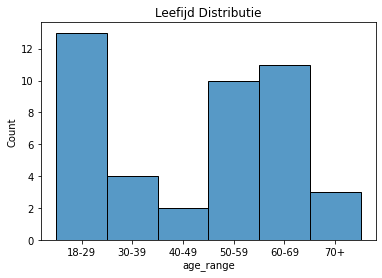

In [5]:
bins = [18, 29, 39, 49, 59, 69, 119]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
results['age_range'] = pd.cut(results.Leeftijd, bins, labels = labels,include_lowest = True)

print("Jongste respondent is: " + str(min(results.Leeftijd)) + " jaar en oudste respondent is: " + 
      str(max(results.Leeftijd)) + " jaar")
sns.histplot(data=results, x="age_range").set_title("Leefijd Distributie");

In [10]:
results[results['age_range'] == '30-39']

,Naam,Leeftijd,Mening_DH_Emily,Klantenservice_Benaderd,Contact_Klantenservice,Ervaring_Klantenservice,Wachttijd,Voordelen_DH,Nadelen_DH,V_VS_M,DH_VS_Mens,Complexe_Vragen,DH_Verstaanbaar,Waarom,Toekomst_DH,age_range
2,Renee,31,"Goed, maar het gesprek ging nog niet inhoudeli...",Ja,Vooral via telefoon,Neutraal,Tussen de 0-10 minuten,Sneller,Moeilijk om de diepte in te gaan,Neutraal,Niet mee eens,Mee eens,Mee eens,Pakket kwijt,Nee,30-39
20,Sharina,30,"Prima, gelukkig niet een te houterige stem.",Ja,Vooral via chatbot,Positief,Tussen de 0-10 minuten,Voordelen zijn o.a dat het persoonlijker aanvo...,Het moet goed en realistisch uitgevoerd worden...,Neutraal,Niet mee eens,Mee eens,Mee eens,"Gemakkelijker dan lange wachtrijen (bellen), d...",Persoonlijk maakt het mij niet zoveel uit of i...,30-39
34,Carmen,32,Kort en duidelijk,Ja,Vooral via email,Neutraal,Tussen de 10-20 minuten,Sneller hulp,Niet juist begrijpen van het probleem,Neutraal,Mee eens,Mee eens,Mee eens,Niet geleverde artikelen,Ja,30-39
37,Vincent,33,Het is beter dan een chatbot,Ja,Vooral via telefoon,Negatief,Tussen de 0-10 minuten,NaN,In feite is het een chatbot. Probleem met chat...,Mee eens,Niet mee eens,Mee eens,Mee eens,Vaak om te begrijpen waar mijn bestelling blijft,Nee,30-39


In [9]:
for i in results[results['age_range'] == '30-39']['Nadelen_DH']:
    print(i)

Moeilijk om de diepte in te gaan
Het moet goed en realistisch uitgevoerd worden. Wanneer de digital human te houterig of pixelig eruit ziet zou ik snel afhaken en komt het daarnaast onprofessioneel over. Je moet het goed doen en anders niet.
Niet juist begrijpen van het probleem
In feite is het een chatbot. Probleem met chatbots is dat ze alleen voorgeprogrammeerde antwoorden kennen (tot nu toe, toekomst misschien anders). En juist die antwoorden kan je altijd al op de website vinden


Tot op heden hebben 43 respondenten deelgenomen aan de enquête. De leeftijden van de respondenten variëren tussen de 19 en 82 jaar. 

#### 2. Wilt de consument in de toekomst gebruik maken van een digital human?

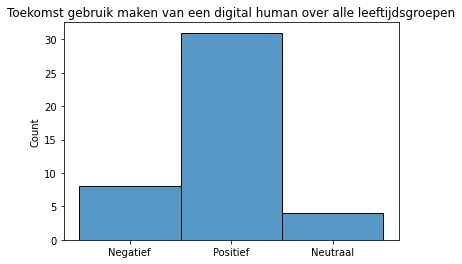

In [18]:
Toekomst_DH_List = []
classification(results['Toekomst_DH'], Toekomst_DH_List)
sns.histplot(data=Toekomst_DH_List).set_title("Toekomst gebruik maken van een digital human over alle leeftijdsgroepen");

Van de 43 respondenten zijn 31 respondenten positief over het gebruik van een digital human in de klantenservice. 8 respondenten zeggen er geen gebruik van willen te maken en 4 respondenten weten het nog niet.  

#### 3. Is er een verschil te zien tussen leeftijsgroepen als er gekeken wordt naar het mogelijke gebruik van een digital human in de toekomst?

Leeftijdsgroepen 18-29 jaar, 30-60 jaar en 60 +

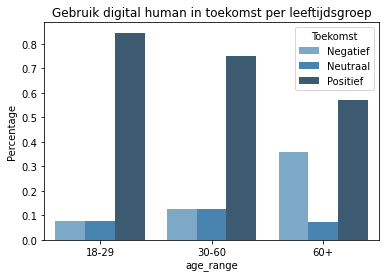

In [115]:
bins = [18, 29, 59, 119]
labels = ['18-29', '30-60', '60+']
new_df5 = pd.DataFrame({'age_range' : [], 'toekomst_dh': []})
new_df5['age_range'] = pd.cut(results.Leeftijd, bins, labels = labels,include_lowest = True)
new_df5['toekomst_dh'] = Toekomst_DH_List

new_df5 = new_df5.groupby(['age_range', 'toekomst_dh']).size().reset_index()
new_df5 = new_df5.rename(columns = {0: 'Aantal'})

a = new_df5.groupby('age_range').sum().reset_index()
mapper = dict(zip(a['age_range'],a['Aantal']))
new_df5['totaal'] = new_df5['age_range'].map(mapper)

percentage_list = []
for i in range(0, len(new_df5)):
    percentage_list.append(new_df5.loc[i]['Aantal']/new_df5.loc[i]['totaal'])
new_df5['Percentage'] = percentage_list

sns.barplot(x='age_range', y='Percentage', hue='toekomst_dh', data=new_df5, palette="Blues_d").set_title('Gebruik digital human in toekomst per leeftijdsgroep')
plt.legend(title='Toekomst', loc='upper right');

Leeftijdsgroepen 18-29 jaar, 30-39 jaar, 40-49 jaar, 50-59 jaar, 60-69 jaar en 70 +

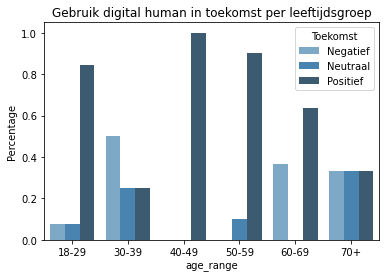

In [16]:
new_df = pd.DataFrame({'age_range' : [], 'toekomst_dh': []})
new_df['age_range'] = results['age_range']
new_df['toekomst_dh'] = Toekomst_DH_List

new_df = new_df.groupby(['age_range', 'toekomst_dh']).size().reset_index()
new_df = new_df.rename(columns = {0: 'Aantal'})

a = new_df.groupby('age_range').sum().reset_index()
mapper = dict(zip(a['age_range'],a['Aantal']))
new_df['totaal'] = new_df['age_range'].map(mapper)

percentage_list2 = []
for i in range(0, len(new_df)):
    percentage_list2.append(new_df.loc[i]['Aantal']/new_df.loc[i]['totaal'])
new_df['Percentage'] = percentage_list2

sns.barplot(x='age_range', y='Percentage', hue='toekomst_dh', data=new_df, palette="Blues_d").set_title('Gebruik digital human in toekomst per leeftijdsgroep')
plt.legend(title='Toekomst', loc='upper right');

Binnen alle leeftijdsgroepen is te zien dat ze in de toekomst graag gebruik willen maken van een digital human. Meer dan 80% van de leeftijdsgroep 18-29 jaar is bereid om in de toekomst contact op te nemen met een digital human om hun te vragen te beantwoorden. De respondenten ouder dan 60 jaar vinden het in de toekomst ook prima om contact op te nemen met een digital human i.p.v. een klantenservice medewerker. Het  percentage is 57%. 

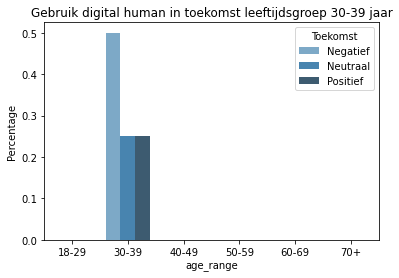

In [19]:
new_df6 = new_df[new_df['age_range'] == '30-39']
sns.barplot(x='age_range', y='Percentage', hue='toekomst_dh', data=new_df6, palette="Blues_d").set_title('Gebruik digital human in toekomst leeftijdsgroep 30-39 jaar')
plt.legend(title='Toekomst', loc='upper right');

30-jarige respondenten laten wisselende meningen zien in resultaten van de enquête over het gebruik van een digital human in de toekomst. Zo zijn maar 25% van de 30-jarige respondenten positief.

#### 4. Hoe vonden consumenten het gebruik van een digital human?

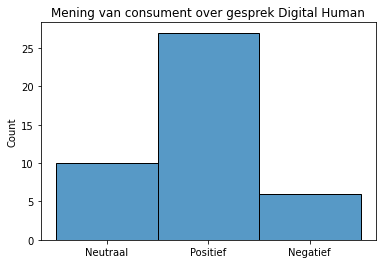

In [11]:
Mening_DH_List = []
classification(results['Mening_DH_Emily'], Mening_DH_List)
sns.histplot(data=Mening_DH_List).set_title("Mening van consument over gesprek Digital Human");

Van de 43 respondenten zijn 27 respondenten zeer te spreken over het korte gesprek met de digital human. Ze vonden het leuk, grappig en vooral ook heel interessant. Enkele respondenten die iets minder te spreken waren over het gesprek met de digital human, vonden het vreemd en onwennig.

#### 5. Wat zijn volgens de consumenten de voordelen van een digital human?

In [12]:
for voordeel in results['Voordelen_DH']:
    print(voordeel)

Het is persoonlijk
Altijd bereikbaar. Niet dat je na een dag werken net te laat bent om te bellen.  Meer menselijk contact. Niet zo'n computer die na je antwoord zegt....ik heb u niet verstaan. Herhaal u antwoord
Sneller
Snel contact en mogelijk sneller antwoord
Voor sommige mensen kan het een lagere drempel zijn, dan een chatbot.
Je hebt meer het idee dat je gehoord wordt.
Snelheid van geholpen worden
Snel reactie
Veel leuker dan een chatbot. Meer interactie
nan
vriendelijke stem
Snelheid en vriendelijk
Je krijgt snel antwoord
Persoonlijker
Minder lang wachten op beschikbaarheid en minder lang wachten op antwoord
Komt persoonlijker over
Voor bijvoorbeeld mensen die het lastig vinden om te typen
veel sneller geholpen en altijd beschikbaar
veel sneller geholpen en altijd beschikbaar
Dat ik niet lang hoef te wachten om geholpen te worden
Voordelen zijn o.a dat het persoonlijker aanvoelt dan een chatbot waar je voor mijn gevoel altijd dezelfde reacties krijgt waar je totaal niets aan hebt

Consumenten zijn van mening dat het grootste voordeel aan een digital human de snelheid is. Je hoeft niet lang te wachten voordat je geholpen wordt. Een ander groot voordeel van een digital human is dat het persoonlijk is. Je word benaderd met je naam en je kunt naar iemand kijken als je je vraag steld. Het derde voordeel is de beschikbaarheid. Een digital human is 24/7 beschikbaar. Je kunt je vraag stellen wanneer jou dat het beste uitkomt.

#### 6. Wat zijn volgens de consumenten de nadelen van een digital human?

In [13]:
for nadeel in results['Nadelen_DH']:
    print(nadeel)

Ze begrijpt niet alles
Ik heb ja gedrukt omdat ik niet weet in hoeverre ze je helemaal kan helpen met je vraag of probleem en of ze die ook kan oplossen of dat je dan later toch nog weer teruggebeld moet worden. Want dan lost dit niets op
Moeilijk om de diepte in te gaan
Ben benieuwd of niet alleen standaard vragen op deze manier beantwoord kan worden, maar ook specifieke vragen
Het blijft een chatbot, met complexere vragen or uitzonderingen of speciale omstandigheden zal je nog steeds een echt mens nodig hebben.
Ik denk dat zij niet veel anders kan dan een digitale chat
nan
Hoop ze ze mij begrijpt
Als de vraag te moeilijk is
Ik weet niet of zij mij verder kan helpen
Ik weet niet of ze mij begrijpt
nan
Complexe vraagstukken kunnen lastig zijn
nan
Als de digital human specifieke onderdelen niet herkent kan het gesprek vastlopen
Kan niet alles oplossen
nan
nan
nan
nan
Het moet goed en realistisch uitgevoerd worden. Wanneer de digital human te houterig of pixelig eruit ziet zou ik snel af

Consumenten denken dat het niet begrijpen van een probleem en het geven van een correct antwoord op een complexe vraag de grootste nadelen zijn van een digital human. 

#### 7. Wat is de ervaring van een consument met een klantenservice?

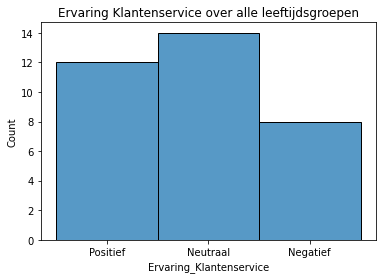

In [20]:
sns.histplot(data=results, x="Ervaring_Klantenservice").set_title("Ervaring Klantenservice over alle leeftijdsgroepen");

33% van de respondenten zegt een neutral ervaring te hebben met de klantenservice. Dit zou kunnen betekenen dat zij de ene keer erg goed geholpen worden en het volgende moment wat minder.  1/5 van de respondenten zegt een negatieve ervaring te hebben met de klantenservice. 28% van de respondenten is positief over het contact met de klantenservice.  

#### 8. Is er een verband tussen de wachttijd en de ervaring van consumenten met een klantenservice?

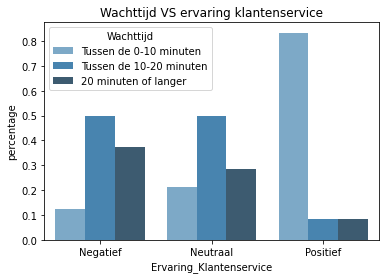

In [21]:
new_df3 = results[['Ervaring_Klantenservice', 'Wachttijd']].dropna().groupby(
    ['Ervaring_Klantenservice', 'Wachttijd']).size().reset_index()
new_df3 = new_df3.rename(columns = {0: 'Aantal'})

a = new_df3.groupby('Ervaring_Klantenservice').sum().reset_index()
mapper = dict(zip(a['Ervaring_Klantenservice'],a['Aantal']))
new_df3['totaal'] = new_df3['Ervaring_Klantenservice'].map(mapper)
new_df3['percentage'] = new_df3['Aantal']/new_df3['totaal']

labels = ['Tussen de 0-10 minuten','Tussen de 10-20 minuten',
          '20 minuten of langer']
sns.barplot(x='Ervaring_Klantenservice', y='percentage', 
            hue='Wachttijd', data=new_df3, 
            palette="Blues_d", hue_order=labels
           ).set_title('Wachttijd VS ervaring klantenservice');

Ja, hoe langer consumenten moeten wachten voordat ze geholpen worden, hoe negatiever de klantenservice ervaring van een consument is. Consumenten hechten erg veel waarde aan snel te woord worden gestaan. 

#### 9. Is er een verschil te zien tussen leeftijdsgroepen als er gekeken wordt naar het soort contact dat ze opnemen met de klantenservice?

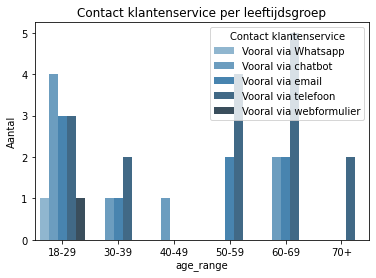

In [14]:
new_df2 = results.groupby(['age_range', 'Contact_Klantenservice']).size().reset_index()
new_df2 = new_df2.rename(columns = {0: 'Aantal'})
sns.barplot(x='age_range', y='Aantal', hue='Contact_Klantenservice', data=new_df2, palette="Blues_d").set_title('Contact klantenservice per leeftijdsgroep')
plt.legend(title='Contact klantenservice', loc='upper right');

Respondenten uit de leeftijdsgroep 18-29 jaar neemt op dit moment via alle soorten manieren contact opneemt met de klantenservice. Via whatsapp, chatbot, email, telefoon en webformulier. De meest gebruikte manier van contact opnemen is voor deze leeftijdsgroep via een chatbot. Een digital human is een uitbreiding van een chatbot waardoor er een erg grote kans is dat deze generatie zonder problemen gebruik zal gaan maken van de digital human. Respondenten uit de leeftijdsgroep 60+ nemen vooral contact via de telefoon. Voor hen  is het belangrijk dat zij ten alle tijden via telefoon contact kunnen opnemen met een klantenservice. Verwacht wordt dat zij nog wat terughoudend zijn in het gebruik van een digital human.  

#### 10. Is er een verschil te zien tussen leeftijdsgroepen als er gekeken wordt naar of zij liever contact opnemen met een digital human of een klantenservice medewerker? 

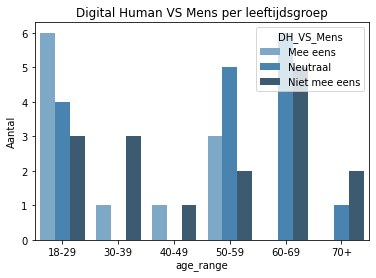

In [25]:
new_df2 = results.groupby(['age_range', 'DH_VS_Mens']).size().reset_index()
new_df2 = new_df2.rename(columns = {0: 'Aantal'})

sns.barplot(x='age_range', y='Aantal', hue='DH_VS_Mens', data=new_df2, palette="Blues_d").set_title('Digital Human VS Mens per leeftijdsgroep')
plt.legend(title='DH_VS_Mens', loc='upper right');

46% van de respondenten uit leeftijdsgroep 18-29 jaar nemen liever contact op met een digital human dan met een mens. 50% van de respondenten die behoren tot leeftijdsgroep 60+ zijn neutraal. Het maakt hun niet uit of ze met een digital human of een mens spreken. De 70 plussers zijn er wel vel op tegen. 2/3 van de respondenten zegt liever een mens te spreken dan een digital human. 

#### 11. Is er een verband te zien tussen de mening van consumenten over het gesprek met de digital human en of zij in de toekomst liever met een digital human of met een klantenservice medewerker willen praten?

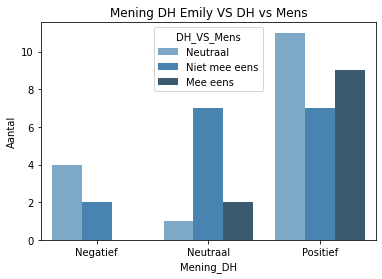

In [22]:
new_df4 = pd.DataFrame(columns=['Mening_DH', 'DH_VS_Mens'])
new_df4['Mening_DH'] = Mening_DH_List
new_df4['DH_VS_Mens'] = results['DH_VS_Mens']

new_df4 = new_df4.groupby(['Mening_DH', 'DH_VS_Mens']).size().reset_index()
new_df4 = new_df4.rename(columns = {0: 'Aantal'})

sns.barplot(x='Mening_DH', y='Aantal', 
            hue='DH_VS_Mens', data=new_df4, 
            palette="Blues_d").set_title('Mening DH Emily VS DH vs Mens');

Ja, hoe leuker mensen het gesprek vonden met de digital human, hoe liever zij met een digital human spreken in plaats van een klantenservice medewerker. 

#### 12. Stellen consumenten complexe vragen liever aan een 'echt' mens?

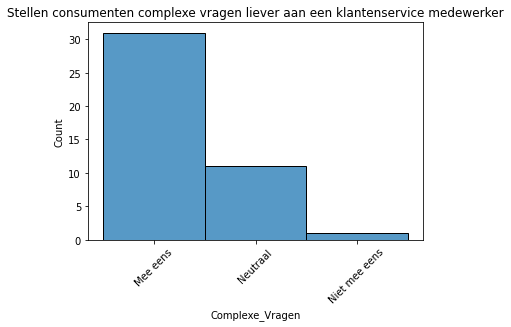

In [23]:
sns.histplot(data=results, x="Complexe_Vragen").set_title("Stellen consumenten complexe vragen liever aan een klantenservice medewerker")
plt.xticks(rotation=45);

70% van alle respondenten zegt complexe/moeilijke vragen liever aan een ‘echt’ mens te stellen. Zij hebben er dan meer vertrouwen in dat de vraag daadwerkelijk beantwoord wordt. 26% van de respondenten zegt het niks uit te maken of zij hun complexe vragen aan een digital human of aan een echt mens moeten stellen. 